# Import all necessary libraries

In [1]:
import os
import torch
import pandas as pd

# See if CUDA is available (not necessary for inferencing)

In [2]:
if torch.cuda.is_available(): 
    print('Using GPU...')
else: 
    print('Using CPU...')

Using CPU...


# About the model I trained...

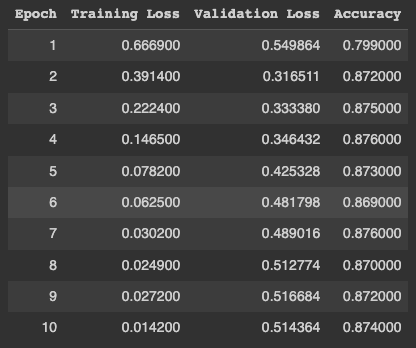

# Load the model/tokenizer

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("model")
tokenizer = AutoTokenizer.from_pretrained("tokenizer")

/Users/elliekuang/opt/anaconda3/envs/ellie/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


# Load test set

In [4]:
def get_abspath(root_dir, extension):
    """Function returns all absolute paths under root directory with extension"""
    full_paths = []
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(extension):
                 full_paths.append(os.path.join(root, file))
    return full_paths 

In [5]:
def read_txt(paths):
    """Function reads all filepaths"""
    lines = []
    for path in paths:
        with open(path) as f:
            lines.append(f.readlines()[0])
    return lines

In [6]:
def preprocess_data(neg_dir, pos_dir):
    """Function preprocesses data and returns pandas dataframe"""
    
    # Extract and read all filepaths
    extension = '.txt'
    neg_text = read_txt(get_abspath(neg_dir, extension))
    pos_text = read_txt(get_abspath(pos_dir, extension))
    
    # Make pandas dataframe
    neg_df = pd.DataFrame({'text':neg_text, 'label':0, 'label_name':'neg'})
    pos_df = pd.DataFrame({'text':pos_text, 'label':1, 'label_name':'pos'})
    
    # Concat dataframes and shuffle for randomization
    df = pd.concat([neg_df, pos_df])
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

In [7]:
test_df = preprocess_data('aclImdb/test/neg', 'aclImdb/test/pos')

In [8]:
test_df.head(10)

,text,label,label_name
0,Of course I'm a bit prejudiced but for the tim...,1,pos
1,Having known and loved this book since I was e...,1,pos
2,I bought this movie sight unseen at a sci-fi c...,0,neg
3,No one would ever question that director Leos ...,1,pos
4,One of the best western movies ever made. Unfo...,1,pos
5,I caught this little gem totally by accident b...,1,pos
6,This is the funniest sequel I have seen in a l...,1,pos
7,This movie is great I really enjoyed it.<br />...,1,pos
8,This is a painfully slow story about the last ...,0,neg
9,"James Stewart plays Dr. Ben McKenna, who, with...",1,pos


# Inference on test set

In [9]:
def inference(text, model):
    """Function return label for prediction of text"""
    encoding = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**encoding)
    return outputs.logits.argmax(-1)

In [10]:
# Randomized mini-batch
test_sample = test_df.sample(frac=1).reset_index(drop=True)[:500]
total = len(test_sample)

correct = 0
for idx,row in test_sample.iterrows():
    print(f'Inferencing {idx+1}/{total}')
    text, gtruth = row['text'], row['label']
    prediction = inference(text, model)
    if (prediction.tolist()[0] == gtruth): correct += 1

Inferencing 1/500
Inferencing 2/500
Inferencing 3/500
Inferencing 4/500
Inferencing 5/500
Inferencing 6/500
Inferencing 7/500
Inferencing 8/500
Inferencing 9/500
Inferencing 10/500
Inferencing 11/500
Inferencing 12/500
Inferencing 13/500
Inferencing 14/500
Inferencing 15/500
Inferencing 16/500
Inferencing 17/500
Inferencing 18/500
Inferencing 19/500
Inferencing 20/500
Inferencing 21/500
Inferencing 22/500
Inferencing 23/500
Inferencing 24/500
Inferencing 25/500
Inferencing 26/500
Inferencing 27/500
Inferencing 28/500
Inferencing 29/500
Inferencing 30/500
Inferencing 31/500
Inferencing 32/500
Inferencing 33/500
Inferencing 34/500
Inferencing 35/500
Inferencing 36/500
Inferencing 37/500
Inferencing 38/500
Inferencing 39/500
Inferencing 40/500
Inferencing 41/500
Inferencing 42/500
Inferencing 43/500
Inferencing 44/500
Inferencing 45/500
Inferencing 46/500
Inferencing 47/500
Inferencing 48/500
Inferencing 49/500
Inferencing 50/500
Inferencing 51/500
Inferencing 52/500
Inferencing 53/500
In

Inferencing 417/500
Inferencing 418/500
Inferencing 419/500
Inferencing 420/500
Inferencing 421/500
Inferencing 422/500
Inferencing 423/500
Inferencing 424/500
Inferencing 425/500
Inferencing 426/500
Inferencing 427/500
Inferencing 428/500
Inferencing 429/500
Inferencing 430/500
Inferencing 431/500
Inferencing 432/500
Inferencing 433/500
Inferencing 434/500
Inferencing 435/500
Inferencing 436/500
Inferencing 437/500
Inferencing 438/500
Inferencing 439/500
Inferencing 440/500
Inferencing 441/500
Inferencing 442/500
Inferencing 443/500
Inferencing 444/500
Inferencing 445/500
Inferencing 446/500
Inferencing 447/500
Inferencing 448/500
Inferencing 449/500
Inferencing 450/500
Inferencing 451/500
Inferencing 452/500
Inferencing 453/500
Inferencing 454/500
Inferencing 455/500
Inferencing 456/500
Inferencing 457/500
Inferencing 458/500
Inferencing 459/500
Inferencing 460/500
Inferencing 461/500
Inferencing 462/500
Inferencing 463/500
Inferencing 464/500
Inferencing 465/500
Inferencing 466/500


In [11]:
accuracy = correct / total
accuracy # compare this to model's accuracy 87%

0.892

# User input

In [12]:
text = 'This movie was alright. Could be better.'
inference(text, model)

tensor([1])